# Instacart Data Analysis

## Introduction

In this project, I will analyze data from Instacart, an online grocery delivery platform where customers can place an order for home delivery. This dataset, originally released by Instacart in 2017 for a Kaggle competition, provides a rich source of information about customer purchasing behaviors. 

The primary objective is to clean and prepare the data, before delivering a comprehensive report that gives valuable insights into the shopping patterns and habits of Instacart’s customers.

## `orders` data frame

In [50]:
import pandas as pd
from matplotlib import pyplot as plt

In [51]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';'); orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


The table contains six columns, where each row corresponds to one order on the Instacart app.

According to the documentation:
- `'order_id'` — ID number that uniquely identifies each order
- `'user_id'` — ID number that uniquely identifies each customer account
- `'order_number '` — the number of times this customer has placed an order
- `'order_dow '` — day of the week that the order placed (which day is 0 is uncertain)
- `'order_hour_of_day'` — hour of the day that the order was placed
- `'days_since_prior_order'` — number of days since this customer placed their previous order

In [3]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [4]:
# Check for all orders placed Wednesday at 2:00 AM
wed = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]; wed.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


In [5]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [6]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [7]:
# Double check for duplicate order IDs only
orders['order_id'].duplicated().sum()

0

In [8]:
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [9]:
# Are there any missing values where it's not a customer's first order?
orders[orders['days_since_prior_order'] > 0]['days_since_prior_order'].isna().sum()

0

## `departments` data frame

In [10]:
departments = pd.read_csv('/datasets/departments.csv', sep=';'); departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


This table shows the the ID to its correlated department.

According to the documentation:
- `'department_id'` — ID number that uniquely identifies each grocery department category
- `'department'` — name of the department

In [11]:
# Check for duplicates in department ID
departments['department_id'].duplicated().sum()

0

## `aisles` data frame

In [12]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';'); aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


This table shows the ID to its correlated aisle.

According to the documentation:
- `'aisle_id'` — ID number that uniquely identifies each grocery aisle category
- `'aisle'` — name of the aisle

In [13]:
# Check for duplicates in aisle ID
aisles['aisle_id'].duplicated().sum()

0

## `products` data frame

In [14]:
products = pd.read_csv('/datasets/products.csv', sep=';'); products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


The table contains four columns, where each row corresponds to a unique product that customers can buy

According to the documentation:
- `'product_id'` — ID number that uniquely identifies each product
- `'product_name'` — name of the product
- `'aisle_id '` — ID number that uniquely identifies each grocery aisle category
- `'department_id '` — ID number that uniquely identifies each grocery department category

In [15]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [16]:
# Check for just duplicate product IDs
products.duplicated(subset='product_id').sum()

0

In [17]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
products.duplicated(subset='product_name').sum()

1361

We can see that there are multiple rows with the same product name but they are not missing

In [18]:
# Check for duplicate product names that aren't missing
duplicate_names = products[(products['product_name'].duplicated())&(products['product_name'].notna())]
duplicate_names.head()

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16


In [19]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [20]:
# Are all of the missing product names associated with aisle ID 100?
products[products['product_name'].isna()]['aisle_id'].unique()

array([100])

We found the missing product names using .isna() and selected the corresponding aisle_ids for that and then selected the unique instances for it. So, it's absolutely correct.

In [21]:
products['aisle_id'][100]

112

In [22]:
# Are all of the missing product names associated with department ID 21?
products[products['product_name'].isna()]['department_id'].unique()

array([21])

In [23]:
products['department_id'][121]

13

In [24]:
# What is this ailse and department?
departments[departments['department_id']==21]

,department_id,department
20,21,missing


In [25]:
aisles[aisles['aisle_id']==100]

,aisle_id,aisle
99,100,missing


In [26]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

## `order_products` data frame

In [27]:
op = pd.read_csv('/datasets/order_products.csv', sep=';'); op.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


This table has four columns, where each row corresponds to one item placed in an order 

According to the documentation:
- `'order_id'` — ID number that uniquely identifies each order
- `'product_id'` — ID number that uniquely identifies each product
- `'add_to_cart_order '` — the sequential order in which each item was placed in the cart
- `'reordered '` — 0 if the customer has never ordered this product before, 1 if they have

In [28]:
# Check for fully duplicate rows
op.duplicated().sum()

0

In [29]:
# Double check for any other tricky duplicates
op.duplicated(subset=['order_id', 'product_id']).sum()

0

Next I will find and remove missing values in this dataframe

In [30]:
# What are the min and max values in this column?
op.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

We can see that there are missing values in the "days_since_prior_order" column.

In [31]:
op['add_to_cart_order'].describe()

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

If we check the `add_to_cart_order` field, we can see that the missing minimum value is 1 and the maximum value is 6.4.

In [54]:
order_id_missing_add_list = sorted(list(op[op['add_to_cart_order'].isna()]['order_id'].unique()))

op[op['order_id'].isin(order_id_missing_add_list)].groupby('order_id').size().min()

nan

Because there are also missing data in the "order_id" column, I will fill in the cells with 999.

In [55]:
# Replace missing values with 999 and convert column to integer type
op['add_to_cart_order'] = op['add_to_cart_order'].fillna(999).astype(int); op.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


Now the data is ready to be used for analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In this section, I will analyze the time and day people shop for groceries. To start, I will check to make sure the values in the day of the week and hour of day are within range of its corresponding fields.

In [56]:
orders[(orders['order_hour_of_day'] >= 0) & (orders['order_hour_of_day'] <= 23)].head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [57]:
orders[(orders['order_dow'] >= 0) & (orders['order_dow'] <= 6)].head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


### [A2] What time of day do people shop for groceries?

Text(0, 0.5, 'Amount of Customers')

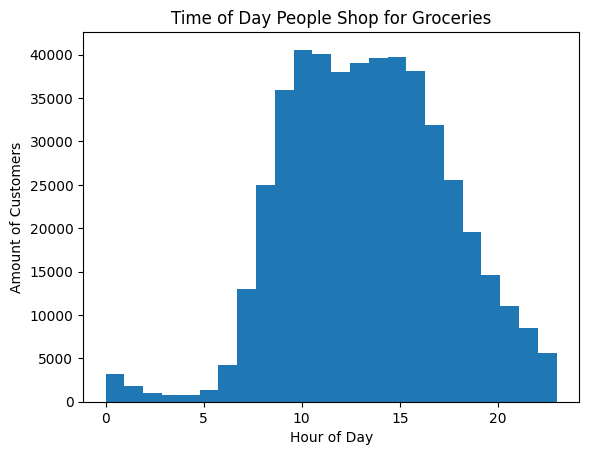

In [58]:
orders['order_hour_of_day'].plot(kind='hist', bins=24)
plt.title('Time of Day People Shop for Groceries')
plt.xlabel('Hour of Day')
plt.ylabel('Amount of Customers')

Now that we know the data is verified, we can now create a chart that shows the frequency of people shopping for groceries throughout the day.

### [A3] What day of the week do people shop for groceries?

Text(0, 0.5, 'Amount of Customers')

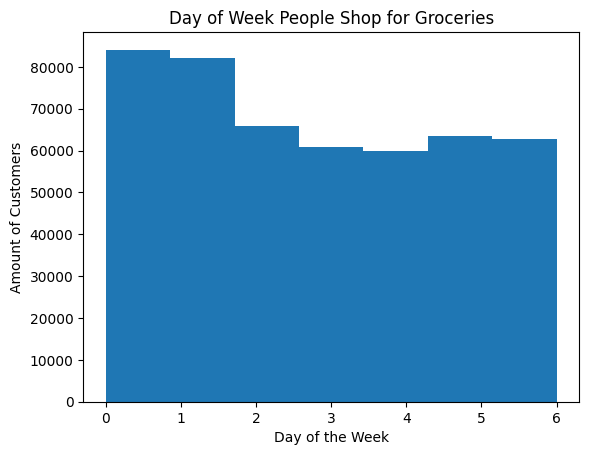

In [59]:
orders['order_dow'].plot(kind='hist', bins=7)
plt.title('Day of Week People Shop for Groceries')
plt.xlabel('Day of the Week')
plt.ylabel('Amount of Customers')

Here is another graph showing the frequency during the days of the week. As displayed, most people shop for groceries during the beginning of week. 

### [A4] How long do people wait until placing another order?

Text(0, 0.5, 'Amount of Customers')

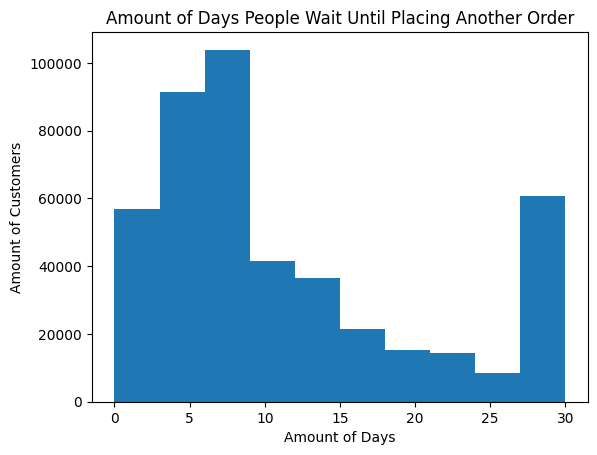

In [60]:
orders['days_since_prior_order'].plot(kind='hist')
plt.title('Amount of Days People Wait Until Placing Another Order')
plt.xlabel('Amount of Days')
plt.ylabel('Amount of Customers')

We can also create another chart showing the amount of days people wait until placing another order. In the graph, we can understand that most customers place another order between days 5 to 10, with another spike at day 30. There also seems a decrease in the frequency from days 10 to 25.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

Text(0.5, 0, 'Hour of Day')

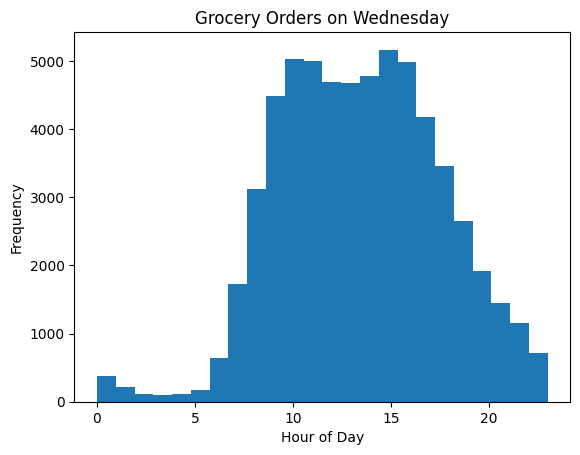

In [41]:
wed = orders[orders['order_dow'] == 3]
wed['order_hour_of_day'].plot(kind='hist', bins=24)
plt.title('Grocery Orders on Wednesday')
plt.xlabel('Hour of Day')

Text(0.5, 0, 'Hour of Day')

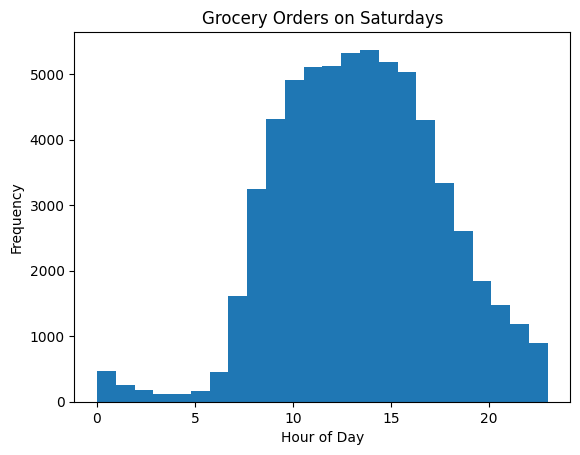

In [42]:
sat = orders[orders['order_dow'] == 6]
sat['order_hour_of_day'].plot(kind='hist', bins=24)
plt.title('Grocery Orders on Saturdays')
plt.xlabel('Hour of Day')

Here, we can see that the charts are very similar, as they both have increased orders during the middle of the day. The only difference is the Wednesday grocery order graph has a slight dip in frequency between 10 and 15 hours. 

### [B2] What's the distribution for the number of orders per customer?

Text(0.5, 0, 'Number of Orders')

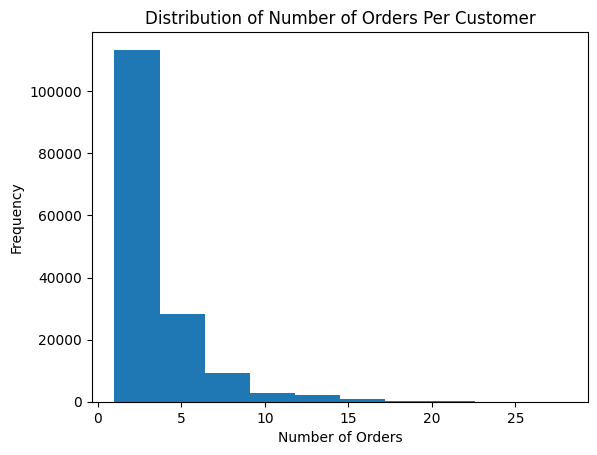

In [43]:
order_counts = orders.groupby('user_id')['order_id'].count().sort_values()
order_counts.plot(kind='hist')
plt.title('Distribution of Number of Orders Per Customer')
plt.xlabel('Number of Orders')

In this graph, we can see that the majority of cusomters have less than five orders.

### [B3] What are the top 20 popular products (display their id and name)?

In [44]:
top = op['product_id'].value_counts()
top_df = pd.DataFrame(top).reset_index()
top_df_names = top_df.merge(products, on="product_id")
top_df.columns = ['product_id', 'count']
top_df_names = top_df.merge(products, on="product_id")
top_df_names.head(20)

,product_id,count,product_name,aisle_id,department_id
0,24852,66050,banana,24,4
1,13176,53297,bag of organic bananas,24,4
2,21137,37039,organic strawberries,24,4
3,21903,33971,organic baby spinach,123,4
4,47209,29773,organic hass avocado,24,4
5,47766,24689,organic avocado,24,4
6,47626,21495,large lemon,24,4
7,16797,20018,strawberries,24,4
8,26209,19690,limes,24,4
9,27845,19600,organic whole milk,84,16


Here is a chart of the top 20 most popular products, with bananas being the most popular. We can also see that most of the products on the list are from department 4 and aisle 24, or the fresh produce section.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

Text(0, 0.5, 'Number of Items')

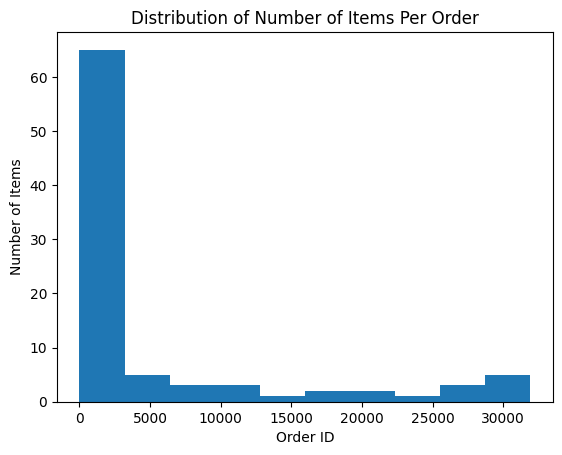

In [45]:
items = op.groupby('order_id')['product_id'].count().value_counts().sort_index()
items.plot(kind='hist')
plt.title('Distribution of Number of Items Per Order')
plt.xlabel('Order ID')
plt.ylabel('Number of Items')

We can see that the order IDs with the lower number have the highest amount of items in the order. On the other hand, the rest of the orders have less than ten items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [46]:
reordered_products = op[op['reordered'] == 1]
reorder_counts = reordered_products['product_id'].value_counts()
top_prod_ids = reorder_counts.head(20).index
top_reordered_products = products[products['product_id'].isin(top_prod_ids)]
top_reordered_products[['product_id', 'product_name']]

,product_id,product_name
5875,5876,organic lemon
8276,8277,apple honeycrisp organic
13175,13176,bag of organic bananas
16796,16797,strawberries
21136,21137,organic strawberries
21902,21903,organic baby spinach
22934,22935,organic yellow onion
24851,24852,banana
24963,24964,organic garlic
26208,26209,limes


Here is a table showing the top 20 items that were reordered most frequently.

### [C3] For each product, what proportion of its orders are reorders?

In [47]:
reorder_props = op.groupby('product_id')['reordered'].mean().reset_index()
reorder_props = reorder_props.merge(products[['product_id','product_name']],on='product_id' )
reorder_props.columns = ['product_id','reorder_proportion','product_name']
reorder_props.head(10)

,product_id,reorder_proportion,product_name
0,1,0.564286,chocolate sandwich cookies
1,2,0.000000,all-seasons salt
2,3,0.738095,robust golden unsweetened oolong tea
3,4,0.510204,smart ones classic favorites mini rigatoni wit...
4,7,0.500000,pure coconut water with orange
5,8,0.315789,cut russet potatoes steam n' mash
6,9,0.761905,light strawberry blueberry yogurt
7,10,0.448071,sparkling orange juice & prickly pear beverage
8,11,0.625000,peach mango juice
9,12,0.390244,chocolate fudge layer cake


Here is part of a table showing the proportion of its orders being reorders

### [C4] For each customer, what proportion of their products ordered are reorders?

In [48]:
customer_reorder_props = op.groupby('order_id')['reordered'].mean().reset_index()
customer_reorder_props = customer_reorder_props.merge(orders[['order_id','user_id']],on='order_id' )
customer_reorder_avg = customer_reorder_props.groupby('user_id')['reordered'].mean().reset_index()
customer_reorder_avg.columns = ['user_id','reorder_proportion']
customer_reorder_avg.head(10)

,user_id,reorder_proportion
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.944444
5,11,0.200000
6,12,0.250000
7,13,0.481481
8,14,0.451587
9,15,0.633333


This table shows the proportion of products ordered that are reorders.

### [C5] What are the top 20 items that people put in their carts first? 

In [49]:
first = op[op['add_to_cart_order']==1]['product_id'].value_counts().head(20)
first = pd.DataFrame(first).reset_index()
first.columns = ['product_id', 'counts']
combine = first.merge(products, on='product_id'); combine

,product_id,counts,product_name,aisle_id,department_id
0,24852,15562,banana,24,4
1,13176,11026,bag of organic bananas,24,4
2,27845,4363,organic whole milk,84,16
3,21137,3946,organic strawberries,24,4
4,47209,3390,organic hass avocado,24,4
5,21903,3336,organic baby spinach,123,4
6,47766,3044,organic avocado,24,4
7,19660,2336,spring water,115,7
8,16797,2308,strawberries,24,4
9,27966,2024,organic raspberries,123,4


This table shows the top 20 items that people put in their carts first.

The research done shows the Instacart consumer behavior throughout the days and weeks, the amount of times items were reordered, and the days since prior order. In addition, I was able to successfully find the top 20 items that people put in their cart and items that were reordered. This analysis will be useful for those looking to understand shopping patterns in the grocery industry.